# Yearly average air temperature analysis fo years 2013-2015

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def get_df(year):
    return pd.read_csv('Environmental_Data_Deep_Moor_{}.csv'.format(year))

In [6]:
def monthly_avg_calc(month, column):
    return df[df['date'].str.contains('201[2345]_[0]?' + str(month))][column].mean()

In [9]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

In [10]:
df = get_df('2013')

### Average monthly temperature, year 2013

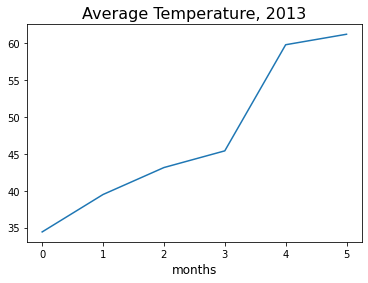

In [18]:
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Temperature, 2013',fontsize=16)
plt.xlabel('months', fontsize=12)
plt.show()

### Average monthly temperature, year 2014

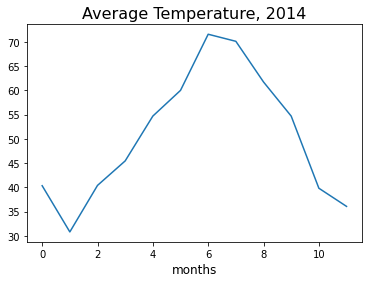

In [16]:
df = get_df('2014')
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Temperature, 2014',fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.show()

### Average monthly temperature, year 2015

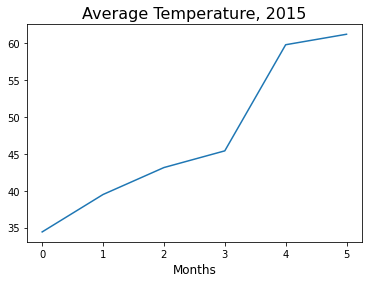

In [20]:
df = get_df('2015')
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Temperature, 2015',fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.show()

In [21]:
def get_years(arr_years):
    newarr=[];
    for i in arr_years:
        df = get_df(i)
        newarr.append(df)
    return newarr

In [22]:
arr = [2013, 2014, 2015]

In [23]:
heights = [year['Air_Temp'].mean() for year in get_years(arr)]

In [24]:
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]
def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]

In [25]:
def min_man_temps(arr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
        ) for s in get_years(arr)]

### 2013-2015 year average air temperature with maximum and minimum temperature information

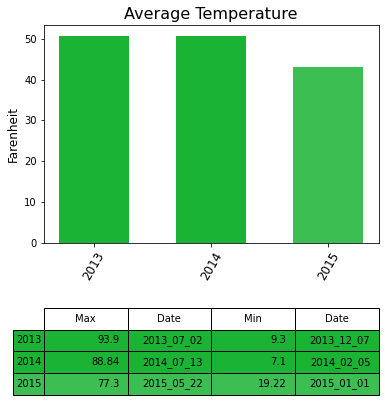

In [47]:
alphas = [height/max(heights) for height in heights]
# RGBA TUPLE (.1,.7,.2,.5)
colors = [(.1,.7,.2,a) for a in alphas]
plt.bar(arr, heights, .6, color=colors)

plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(np.arange(2013,2016,1), rotation=60, fontsize=12)
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_man_temps(arr), bbox=[0, -0.7, 1, 0.4],
         rowLabels=arr,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors])

plt.show()
